In [1]:
import os 
os.chdir("../")

In [2]:
import pandas as pd
from scripts.feature_engineering import compute_customer_metrics, extract_transaction_features, encode_categorical_columns, scale_numerical_columns
from scripts.Default_estimator_WoE import calculate_rfms, create_default_estimator, visualize_rfms, woe_binning


One-Hot Encoded DataFrame:
              TransactionId         BatchId       AccountId  \
0       TransactionId_76871   BatchId_36123  AccountId_3957   
1       TransactionId_73770   BatchId_15642  AccountId_4841   
2       TransactionId_26203   BatchId_53941  AccountId_4229   
3         TransactionId_380  BatchId_102363   AccountId_648   
4       TransactionId_28195   BatchId_38780  AccountId_4841   
...                     ...             ...             ...   
95657   TransactionId_89881   BatchId_96668  AccountId_4841   
95658   TransactionId_91597    BatchId_3503  AccountId_3439   
95659   TransactionId_82501  BatchId_118602  AccountId_4841   
95660  TransactionId_136354   BatchId_70924  AccountId_1346   
95661   TransactionId_35670   BatchId_29317  AccountId_4841   

            SubscriptionId       CustomerId  CountryCode   Amount  Value  \
0       SubscriptionId_887  CustomerId_4406          256   1000.0   1000   
1      SubscriptionId_3829  CustomerId_4406          256    -20.

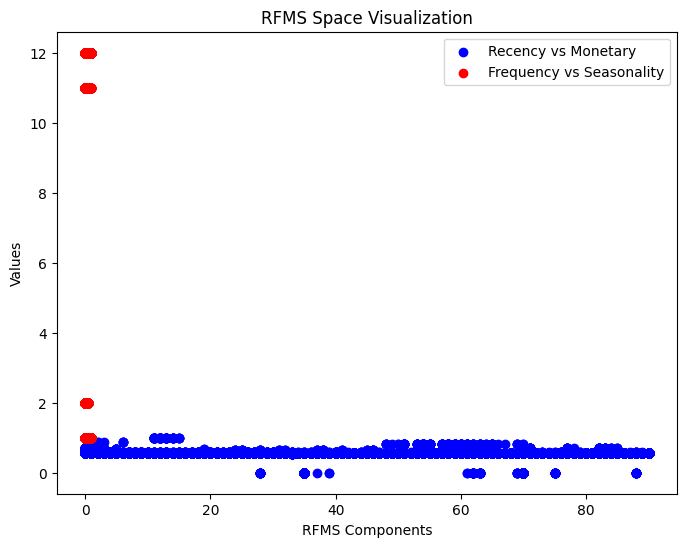

c:\Users\windows 10\Desktop\buy_now_pay_later_Credit_Scoring_Model\buy_now_pay_later_Credit_Scoring_Model\scripts\Default_estimator_WoE.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('bin')


In [66]:
df = pd.read_csv("data/data.csv")
aggregate_features = compute_customer_metrics(df)
merged_df = pd.merge(df, aggregate_features , on = 'CustomerId')
df = merged_df
extracted_features = extract_transaction_features(df)
columns_to_one_hot_encode = ["CurrencyCode", "ProviderId", "ProductId", "ProductCategory", "ChannelId"]

# Apply One-Hot Encoding to specified columns
df = encode_categorical_columns(df, columns_to_one_hot_encode, encoding_type='onehot')
print("One-Hot Encoded DataFrame:")
print(df)
df = scale_numerical_columns(df,  ["Amount", "Value","TotalTransactionAmount", "AverageTransactionAmount", "TransactionCount", "TransactionStdDev" ], "normalize")
df = calculate_rfms(df)
visualize_rfms(df)
df = create_default_estimator(df)

# Perform WoE binning on 'TotalTransactionAmount' as an example
df = woe_binning(df, 'Label', 'TotalTransactionAmount')

# Display resulting dataframe with calculated RFMS, Labels, and WoE
# print(df[['TransactionId', 'RFMS_Score', 'Label', 'WoE']].head(20))




In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 71 columns):
 #   Column                              Non-Null Count  Dtype              
---  ------                              --------------  -----              
 0   TransactionId                       95662 non-null  object             
 1   BatchId                             95662 non-null  object             
 2   AccountId                           95662 non-null  object             
 3   SubscriptionId                      95662 non-null  object             
 4   CustomerId                          95662 non-null  object             
 5   CountryCode                         95662 non-null  int64              
 6   Amount                              95662 non-null  float64            
 7   Value                               95662 non-null  float64            
 8   TransactionStartTime                95662 non-null  datetime64[ns, UTC]
 9   PricingStrategy                     956

In [61]:
columns_to_one_hot_encode = ["Label", "bin"]

# Apply One-Hot Encoding to specified columns
df = encode_categorical_columns(df, columns_to_one_hot_encode, encoding_type='onehot')
print("One-Hot Encoded DataFrame:")
print(df)




One-Hot Encoded DataFrame:
              TransactionId         BatchId       AccountId  \
0       TransactionId_76871   BatchId_36123  AccountId_3957   
1       TransactionId_73770   BatchId_15642  AccountId_4841   
2       TransactionId_26203   BatchId_53941  AccountId_4229   
3         TransactionId_380  BatchId_102363   AccountId_648   
4       TransactionId_28195   BatchId_38780  AccountId_4841   
...                     ...             ...             ...   
95657   TransactionId_89881   BatchId_96668  AccountId_4841   
95658   TransactionId_91597    BatchId_3503  AccountId_3439   
95659   TransactionId_82501  BatchId_118602  AccountId_4841   
95660  TransactionId_136354   BatchId_70924  AccountId_1346   
95661   TransactionId_35670   BatchId_29317  AccountId_4841   

            SubscriptionId       CustomerId  CountryCode    Amount     Value  \
0       SubscriptionId_887  CustomerId_4406          256  0.092004  0.000101   
1      SubscriptionId_3829  CustomerId_4406          256

In [68]:
# Define unimportant columns to drop
unimportant_columns = [
     'TransactionId', 'BatchId', 'AccountId', 'SubscriptionId',
    'CustomerId', 'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId',
    'ProductCategory', 'ChannelId', 'TransactionStartTime', 'PricingStrategy',
    'TransactionHour', 'TransactionDay', 'TransactionMonth', 'TransactionYear'
]


# Drop unimportant columns
df_cleaned = df.drop(columns=unimportant_columns)

# Output the cleaned dataframe
print("Remaining columns after removing unimportant ones:")
print(df_cleaned.columns)

# Save the cleaned dataframe to a new file (optional)
df_cleaned.to_csv('data/cleaned_dataset1.csv', index=False)



Remaining columns after removing unimportant ones:
Index(['Amount', 'Value', 'FraudResult', 'TotalTransactionAmount',
       'AverageTransactionAmount', 'TransactionCount', 'TransactionStdDev',
       'CurrencyCode_UGX', 'ProviderId_ProviderId_1',
       'ProviderId_ProviderId_2', 'ProviderId_ProviderId_3',
       'ProviderId_ProviderId_4', 'ProviderId_ProviderId_5',
       'ProviderId_ProviderId_6', 'ProductId_ProductId_1',
       'ProductId_ProductId_10', 'ProductId_ProductId_11',
       'ProductId_ProductId_12', 'ProductId_ProductId_13',
       'ProductId_ProductId_14', 'ProductId_ProductId_15',
       'ProductId_ProductId_16', 'ProductId_ProductId_19',
       'ProductId_ProductId_2', 'ProductId_ProductId_20',
       'ProductId_ProductId_21', 'ProductId_ProductId_22',
       'ProductId_ProductId_23', 'ProductId_ProductId_24',
       'ProductId_ProductId_27', 'ProductId_ProductId_3',
       'ProductId_ProductId_4', 'ProductId_ProductId_5',
       'ProductId_ProductId_6', 'ProductId_P

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 81 columns):
 #   Column                              Non-Null Count  Dtype              
---  ------                              --------------  -----              
 0   TransactionId                       95662 non-null  object             
 1   BatchId                             95662 non-null  object             
 2   AccountId                           95662 non-null  object             
 3   SubscriptionId                      95662 non-null  object             
 4   CustomerId                          95662 non-null  object             
 5   CountryCode                         95662 non-null  int64              
 6   Amount                              95662 non-null  float64            
 7   Value                               95662 non-null  float64            
 8   TransactionStartTime                95662 non-null  datetime64[ns, UTC]
 9   PricingStrategy                     956

In [29]:
df.to_csv("data/cleaned_data.csv")

In [ ]:
df['Label'].value_counts()

In [ ]:
df.info()

In [32]:
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score


# Data Splitting Function
def split_data(df, target_column = "Label", test_size = 0.3, random_state =42):
    """Splits the dataframe into training and test sets."""
    x = df.drop(columns = [target_column])
    y = df[target_column]

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= test_size, random_state= random_state)
    return x_train, x_test, y_train, y_test


# Model Training Function
def train_model(x_train, y_train, model_type = 'logistic'):
    """Trains a model based on the specified model type."""
    if model_type == 'logistic':
        model = LogisticRegression(max_iter=1000)
    elif model_type == 'decision_tree':
        model = DecisionTreeClassifier()
    elif model_type == 'random_forest':
        model = RandomForestClassifier
    elif model_type == 'gbm':
        model = GradientBoostingClassifier
    else:
        raise ValueError("Inbalid model type. Choose from ['logistic', 'decition_tree', 'random_forest', 'gbm']")
    

    model.fit(x_train, y_train)
    return model


# Hyperparameter Tuning Function
def tune_hyperparameters(x_train, y_train, model, param_grid, search_type='grid', cv=5, n_iter= 10):
    """Tunes the model's hyperparameters using Grid Search or Random Search."""
    if search_type == 'grid':
        search = GridSearchCV(model, param_grid, cv=cv, scoring='accuracy')
    elif search_type == 'random':
        search = RandomizedSearchCV(model, param_grid, cv=cv, n_iter = n_iter, scoring= 'accuracy')
    else:
        raise ValueError("Invalid search type. Choose 'grid' or 'random'")
    
    search.fit(x_train, y_train)
    return search.best_estimator_


# Model Evaluation Function
def evaluate_model(model, x_test, y_test):
    """Evaluates the model's performance on the test data."""
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(f'Accuracy: {accuracy}')
    print("Classification Report:")
    print(report)


# Main function to run the model traing and evaluation
def run_model_training(df):
    """Runs the complet model selection, training, tuning, and evaluation pipeline."""
    # Split the data 
    x_train, x_test, y_train, y_test = split_data(df)

    #select two models for training
    models = ['logistic', 'random_forest']


    for model_type in models:
        print(f"\nTranining {model_type} model...")

        #Train the model
        model = train_model(x_train, y_train, model_type)
        

        #Define hyperparameter grid for tuning
        if model_type == 'logistc':
            param_grid ={'c':[0.01, 0.1, 1, 10]}
        elif model_type == 'random_forest':
            param_grid ={ 'n_estimators': [100, 200], 'max_dept': [10,20,30]}
        

        # Hyperparameter tuning
        best_model = tune_hyperparameters(x_train, y_train, model, param_grid, search_type = 'grid')


        # Evaluate the model 
        print(f"\nEvaluating {model_type} model after tuning...")
        evaluate_model(best_model, x_test, y_test)



In [ ]:
df.columns

In [ ]:
run_model_training(df_cleaned)